### **Task 1: Data Preprocessing and EDA**
#### *GMF Investments Portfolio Analysis*

In [2]:
import sys
import os
path = os.path.abspath('../src')
if path not in sys.path:
    sys.path.append(path)

from data_loader import DataLoader
from eda_analysis import EDAAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Data Exploration and Analysis

In [3]:
# Load data
loader = DataLoader()
raw_data = loader.fetch_data()
raw_data

INFO:data_loader:DataLoader initialized with date range: 2015-07-01 to 2024-12-31
INFO:data_loader:Fetching data from Yahoo Finance...
g:\Courses\10 Academy\Week 11\Time-Series-Portfolio-Opt\src\data_loader.py:71: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(self.tickers, start=self.start_date, end=self.end_date)
[*********************100%***********************]  3 of 3 completed
INFO:data_loader:Successfully fetched 2391 rows of data


Price           Close                               High              \
Ticker            BND         SPY        TSLA        BND         SPY   
Date                                                                   
2015-07-01  60.816738  174.917130   17.943333  60.914464  175.363905   
2015-07-02  60.967098  174.756943   18.667999  61.027240  175.566203   
2015-07-06  61.177578  174.259567   18.648001  61.222687  175.043527   
2015-07-07  61.237705  175.355469   17.858667  61.470746  175.481910   
2015-07-08  61.410610  172.413452   16.997334  61.463233  174.293280   
...               ...         ...         ...        ...         ...   
2024-12-23  70.148468  591.158813  430.600006  70.372611  591.765177   
2024-12-24  70.249153  597.729553  462.279999  70.249153  597.769355   
2024-12-26  70.298058  597.769348  454.130005  70.317609  598.902533   
2024-12-27  70.151405  591.476868  431.660004  70.327395  594.230439   
2024-12-30  70.425156  584.727173  417.410004  70.474045  588.226291   

Price                         Low                               Open  \
Ticker            TSLA        BND         SPY        TSLA        BND   
Date                                                                   
2015-07-01   18.174667  60.764116  174.124732   17.856667  60.794186   
2015-07-02   18.830000  60.937027  174.335456   18.220667  60.937027   
2015-07-06   18.779333  61.057301  173.256426   18.420000  61.222687   
2015-07-07   18.346666  61.237705  172.059437   17.384666  61.410611   
2015-07-08   17.386667  61.312879  172.177420   16.954000  61.373020   
...                ...        ...         ...         ...        ...   
2024-12-23  434.510010  70.109485  584.170528  415.410004  70.294645   
2024-12-24  462.779999  70.024282  591.934154  435.140015  70.053612   
2024-12-26  465.329987  70.034069  594.528696  451.019989  70.034069   
2024-12-27  450.000000  70.141626  587.252104  426.500000  70.288286   
2024-12-30  427.000000  70.298055  580.939799  415.750000  70.298055   

Price                                Volume                        
Ticker             SPY        TSLA      BND        SPY       TSLA  
Date                                                               
2015-07-01  175.111010   18.073999  5399300  135979900   31518000  
2015-07-02  175.397611   18.680000  1060100  104373700  107458500  
2015-07-06  173.458745   18.591999  2210700  117975400   61828500  
2015-07-07  174.461918   18.333332  4183200  173820200   91576500  
2015-07-08  174.006672   17.288000  1967800  164020100   93316500  
...                ...         ...      ...        ...        ...  
2024-12-23  587.381389  431.000000  7605400   57635800   72698100  
2024-12-24  592.520677  435.899994  4185300   33160100   59551800  
2024-12-26  595.940247  465.160004  8714400   41219100   76366400  
2024-12-27  593.991813  449.519989  9018700   64969300   82666800  
2024-12-30  584.399176  419.399994  8054500   56578800   64941000  

[2391 rows x 15 columns]

In [4]:
# Show the shape of the raw data
raw_data.shape

(2391, 15)

In [5]:
# Basic column names for each assets 
raw_data.columns.levels[0]

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [6]:
# Calculating daily returns of assets 
daily_return, volatility = loader.calculate(raw_data)
print('--------- Daily Return Data ---------')
display(daily_return.head())

INFO:data_loader:Successfully calculated daily returns and volatility


--------- Daily Return Data ---------


Ticker,BND,SPY,TSLA
Date,,,
2015-07-02,0.002472,-0.000916,0.040386
2015-07-06,0.003452,-0.002846,-0.001071
2015-07-07,0.000983,0.006289,-0.042328
2015-07-08,0.002824,-0.016777,-0.048231
2015-07-09,-0.003305,0.001809,0.011610


In [7]:
import warnings
warnings.filterwarnings('ignore')
eda = EDAAnalysis()

# Calculating Basic statistics
stats = eda.basic_statistics()
print("\nBasic Statistics:")

display(stats)

INFO:data_loader:DataLoader initialized with date range: 2015-07-01 to 2024-12-31
INFO:data_loader:Fetching data from Yahoo Finance...


[*********************100%***********************]  3 of 3 completed
INFO:data_loader:Successfully fetched 2391 rows of data
INFO:eda_analysis:EDAAnalysis initialized successfully
INFO:data_loader:Successfully calculated daily returns and volatility



Basic Statistics:


,count,mean,std,min,max,Variance,Skewness,Kurtosis
Ticker,,,,,,,,
BND,2390.0,0.000067,0.003473,-0.054385,0.042201,0.000012,-0.970445,37.878765
SPY,2390.0,0.000569,0.011252,-0.109424,0.090603,0.000127,-0.561689,12.670450
TSLA,2390.0,0.001986,0.036646,-0.210628,0.219190,0.001343,0.272851,4.235757


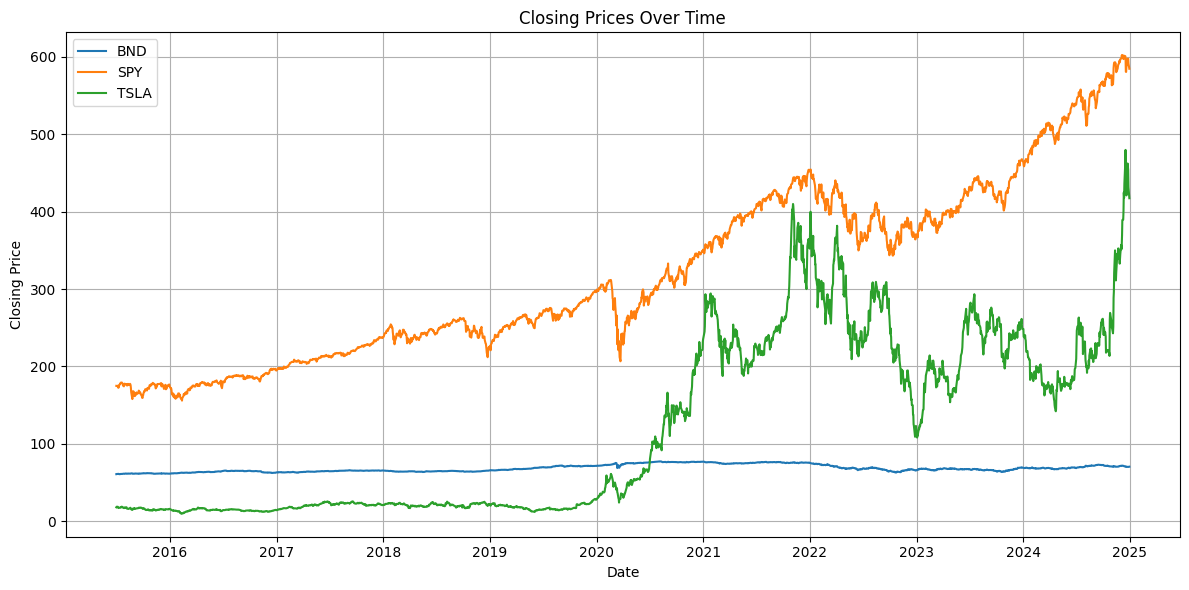

INFO:eda_analysis:Closing prices plot generated successfully


In [8]:
# Closing Price trends over time
eda.plot_closing_prices()

### Calculating Daily Returns of Assets

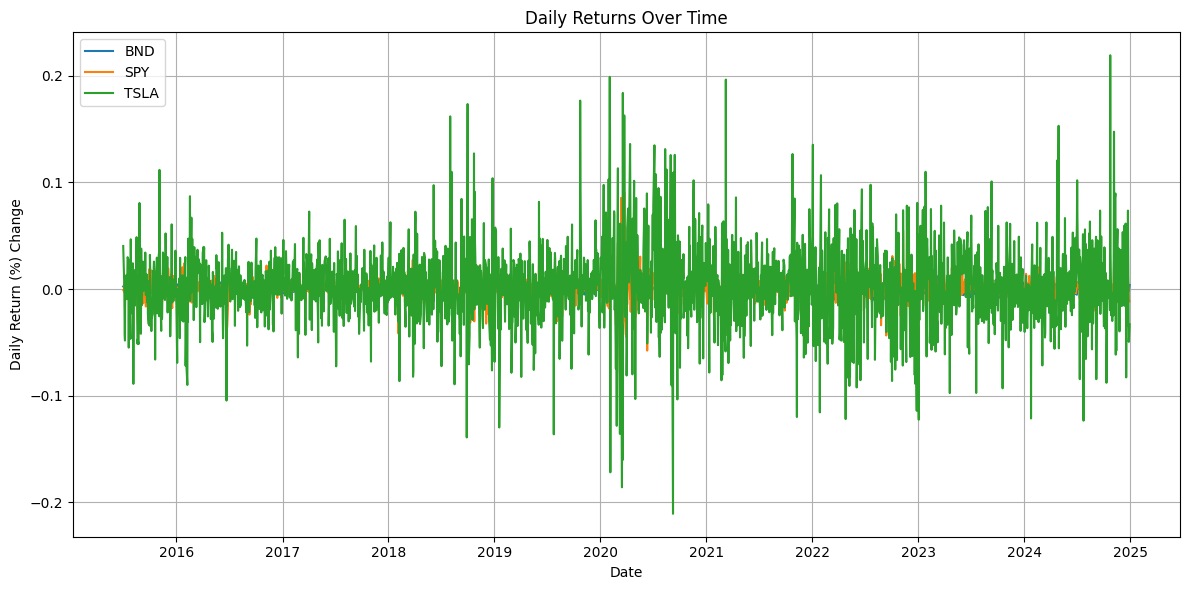

INFO:eda_analysis:Daily returns plot generated successfully


,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
BND,2390.0,0.000067,0.003473,-0.054385,-0.001511,0.000125,0.001747,0.042201
SPY,2390.0,0.000569,0.011252,-0.109424,-0.003652,0.000612,0.005961,0.090603
TSLA,2390.0,0.001986,0.036646,-0.210628,-0.016545,0.001351,0.019522,0.219190


In [32]:
# Daily Returns trends over time
eda.plot_daily_return()

### Calculating Volatility of Assets 

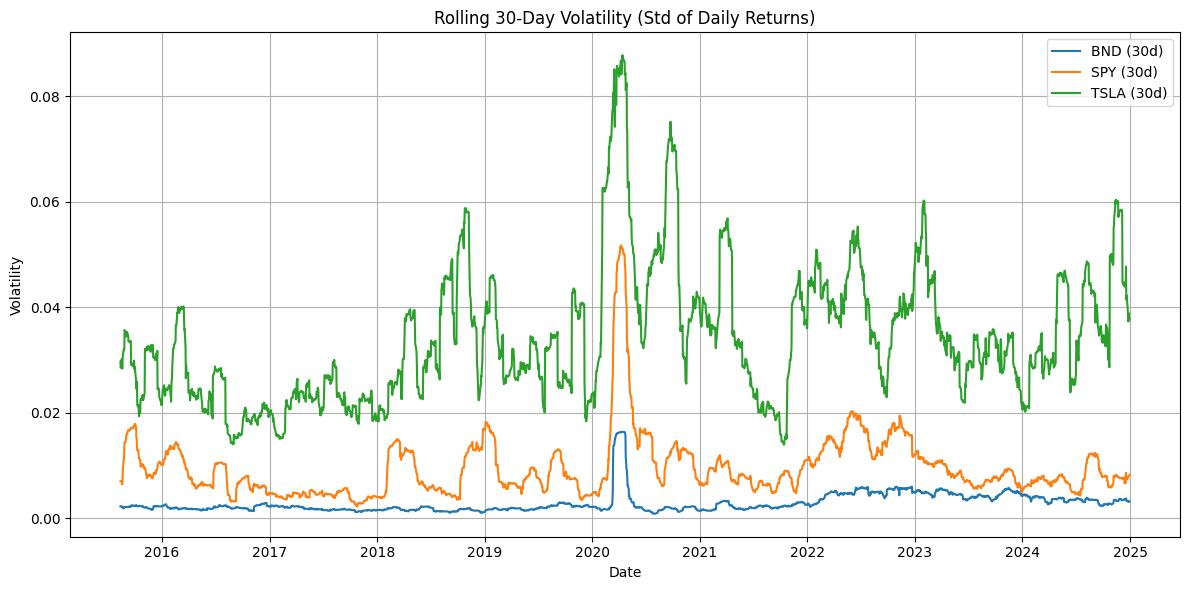

INFO:eda_analysis:Volatility plot generated for 30-day window


Ticker,BND,SPY,TSLA
Date,,,
2015-08-13,0.002284,0.007020,0.029667
2015-08-14,0.002252,0.007044,0.028541
2015-08-17,0.002191,0.007080,0.030136
2015-08-18,0.002217,0.007025,0.029508
2015-08-19,0.002252,0.006443,0.028386
...,...,...,...
2024-12-23,0.003278,0.007533,0.040281
2024-12-24,0.003281,0.007804,0.039291
2024-12-26,0.003101,0.007778,0.037305


In [33]:
#plot Volatility trends over time
eda.plot_volatility()

### Stationary Test 

In [34]:
from termcolor import colored
# Data Stationary test
stationarity = eda.test_stationarity()
print(colored("Stationarity Test Results:", 'blue', attrs=['bold']))
display(stationarity)

# Interpret the stationarity test results
print("\nInterpretation:")
for ticker, row in stationarity.iterrows():
    print(f"{ticker}: p-value = {row['p_value']:.4f} -> {row['stationarity']}")
    if row['p_value'] < 0.05:
        print(colored(f" The {ticker} time series is likely stationary (rejects null hypothesis).", 'red', attrs=['bold']))
    else:
        print(colored(f" The {ticker} time series is likely non-stationary (fails to reject null hypothesis).", 'green', attrs=['bold']))

Stationarity Test Results:


,adf_stat,p_value,used_lag,n_obs,stationarity
BND,-1.53625,0.515509,13,2521,Non-Stationary
SPY,0.690813,0.989653,9,2525,Non-Stationary
TSLA,-1.418872,0.573196,27,2507,Non-Stationary



Interpretation:
BND: p-value = 0.5155 -> Non-Stationary
 The BND time series is likely non-stationary (fails to reject null hypothesis).
SPY: p-value = 0.9897 -> Non-Stationary
 The SPY time series is likely non-stationary (fails to reject null hypothesis).
TSLA: p-value = 0.5732 -> Non-Stationary
 The TSLA time series is likely non-stationary (fails to reject null hypothesis).


### Risk Analysis

In [34]:
# Risk metrics for TSLA
risk_metrics = eda.calculate_risk_metrics('TSLA')
display(risk_metrics)

print(f"TSLA Risk Metrics:")
print(f"VaR _ 95: {risk_metrics['VaR_95']}")
print(f"Sharpe Ratio: {risk_metrics['Sharpe_Ratio']}")

INFO:data_loader:Successfully calculated daily returns and volatility
INFO:eda_analysis:Risk metrics calculated for TSLA


{'VaR_95': np.float64(-0.05270989750313258),
 'Sharpe_Ratio': np.float64(0.8602703160470636)}

TSLA Risk Metrics:
VaR _ 95: -0.05270989750313258
Sharpe Ratio: 0.8602703160470636
